# Max Sharpe Ratio Portfolio

We've already seen that given a set of expected returns and a covariance matrix, we can plot the efficient frontier. Instead of minimizing the vol based on a target return, we want to find that one point on the curve that maximizes the Sharpe Ratio, given the risk free rate. This is called Max Sharpe Ratio Portfolio

In [1]:
import pandas as pd
import numpy as np
import portfolio_tool_kit as ptk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
ind = ptk.get_ind_returns()
er = ptk.annualized_ret(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [22]:
from scipy.optimize import minimize
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0), ) * n # a N-tuple of 2-tuples
    # construct the constraints
    weights_sum_to_1 = { 'type' : 'eq',
                         'fun' : lambda weights: np.sum(weights) - 1
                       }
    
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = ptk.portfolio_ret(weights, er)
        vol = ptk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe,
                       init_guess,
                       args=(riskfree_rate, er, cov),
                       method='SLSQP',
                       options={'disp':False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x   

Let's guess where the point may be

(0.0, 0.14178366250989724)

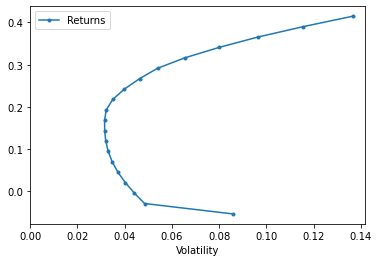

In [10]:
ax = ptk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

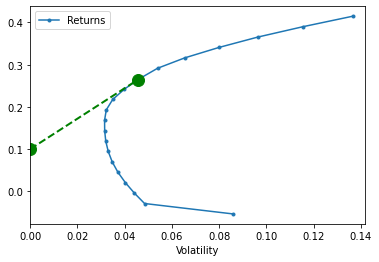

In [23]:
# plot EF
ax = ptk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
# get MSR
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = ptk.portfolio_ret(w_msr, er)
vol_msr = ptk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [25]:
r_msr, vol_msr

(0.2647394781545928, 0.04571973099959878)

Let's put msr to tool kit and add CML to the plot_ef code

<AxesSubplot:xlabel='Volatility'>

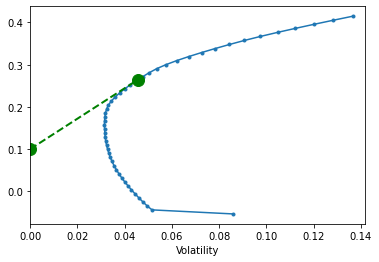

In [30]:
ptk.plot_ef(50, er, cov, style='-', show_cml=True, riskfree_rate=0.1)